In [158]:

from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")

In [159]:
import os

import pandas as pd

housing = pd.read_csv('/Users/williamstanford/Desktop/train.csv')
test = pd.read_csv('/Users/williamstanford/Desktop/test.csv')
sample_submission = pd.read_csv('/Users/williamstanford/Desktop/sample_submission.csv')

In [160]:
housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [161]:
housing = housing.select_dtypes(exclude=['object'])
housing.fillna(0,inplace=True)
housing.drop('Id',axis = 1, inplace = True)

ID = test.Id
test = test.select_dtypes(exclude=['object'])
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

In [162]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [163]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(housing)
y_noano = clf.predict(housing)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

housing = housing.iloc[y_noano[y_noano['Top'] == 1].index.values]
housing.reset_index(drop = True, inplace = True)

print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", housing.shape[0])

Number of Outliers: 146
Number of rows without outliers: 1314


In [164]:
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [165]:
import warnings
from sklearn.preprocessing import MinMaxScaler
import numpy as np
warnings.filterwarnings('ignore')

scaler = MinMaxScaler()

housing_labels = housing["SalePrice"]
housing_labels = np.log(housing_labels+1)
housing.drop("SalePrice", axis=1, inplace=True)
housing_prepared = housing
#housing_prepared = scaler.fit_transform(housing)
#test = scaler.fit_transform(test)

In [166]:
housing_labels.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [167]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score


ridge = Ridge(alpha=10)
ridge.fit(housing_prepared, housing_labels)
np.sqrt(-cross_val_score(ridge, housing_prepared, housing_labels, cv=5, scoring="neg_mean_squared_error")).mean()

0.12404969096474705

In [168]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
np.sqrt(-cross_val_score(ridge, housing_prepared, housing_labels, cv=5, scoring="neg_mean_squared_error")).mean()

0.12404969096474705

In [169]:
housing_predictions = ridge.predict(housing_prepared)

In [170]:
housing_predictions = ridge.predict(housing_prepared)
resid = housing_labels - housing_predictions
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers1 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers1

array([  28,   60,   83,  126,  162,  173,  248,  294,  369,  387,  415,
        425,  430,  485,  499,  562,  566,  589,  592,  595,  598,  610,
        617,  633,  637,  641,  653,  692,  694,  726,  773,  783,  819,
        823,  867,  869,  951,  959,  966,  979, 1062, 1091, 1119, 1172,
       1190, 1200, 1237, 1289, 1308])

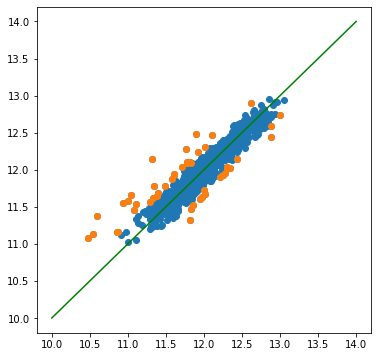

In [171]:
plt.figure(figsize=(6, 6))
plt.scatter(housing_labels, housing_predictions)
plt.scatter(housing_labels.iloc[outliers1], housing_predictions[outliers1])
plt.plot(range(10, 15), range(10, 15), color="green")

In [174]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(housing_prepared, housing_labels)
np.sqrt(-cross_val_score(er, housing_prepared, housing_labels, cv=5, scoring="neg_mean_squared_error")).mean()

0.12405198277594054

In [173]:
housing_predictions = er.predict(housing_prepared)
resid = housing_labels - housing_predictions
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
z = np.array(z)
outliers2 = np.where(abs(z) > abs(z).std() * 3)[0]
outliers2

array([  28,   60,   83,  126,  128,  162,  173,  248,  294,  369,  387,
        415,  425,  430,  485,  499,  562,  566,  589,  592,  595,  598,
        610,  617,  633,  637,  641,  653,  663,  692,  694,  726,  773,
        783,  823,  867,  869,  951,  959,  966,  979, 1062, 1091, 1119,
       1172, 1190, 1200, 1237, 1289, 1308])

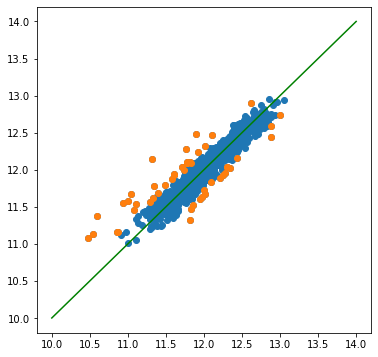

In [150]:
plt.figure(figsize=(6, 6))
plt.scatter(housing_labels, housing_predictions)
plt.scatter(housing_labels.iloc[outliers2], housing_predictions[outliers2])
plt.plot(range(10, 15), range(10, 15), color="green")

In [151]:
outliers = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outliers.append(i)

# git rid of outliers
outliers

[28,
 60,
 83,
 126,
 162,
 173,
 248,
 294,
 369,
 387,
 415,
 425,
 430,
 485,
 499,
 562,
 566,
 589,
 592,
 595,
 598,
 610,
 617,
 633,
 637,
 641,
 653,
 692,
 694,
 726,
 773,
 783,
 823,
 867,
 869,
 951,
 959,
 966,
 979,
 1062,
 1091,
 1119,
 1172,
 1190,
 1200,
 1237,
 1289,
 1308]

In [152]:
housing = pd.read_csv('/Users/williamstanford/Desktop/train.csv')
housing = housing.drop(outliers)
housing_labels = housing["SalePrice"]
housing_labels = np.log(housing_labels+1)

housing = housing.select_dtypes(exclude=['object'])
housing.fillna(0,inplace=True)
housing.drop('Id',axis = 1, inplace = True)
housing.drop("SalePrice", axis=1, inplace=True)
housing_prepared = housing

In [153]:
gbr = GradientBoostingRegressor(max_depth=4, n_estimators=150)
gbr.fit(housing_prepared, housing_labels)
np.sqrt(-cross_val_score(gbr, housing_prepared, housing_labels, cv=5, scoring="neg_mean_squared_error")).mean()

0.13596339914815503

In [154]:
lsr = Lasso(alpha=0.00047)
lsr.fit(housing_prepared, housing_labels)
np.sqrt(-cross_val_score(lsr, housing_prepared, housing_labels, cv=5, scoring="neg_mean_squared_error")).mean()

0.15618038903689516

In [155]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(housing_prepared, housing_labels)
np.sqrt(-cross_val_score(er, housing_prepared, housing_labels, cv=5, scoring="neg_mean_squared_error")).mean()

0.15618744024929446

In [128]:
# Use all four models added together
train_predict = 0.4*gbr.predict(housing_prepared) + 0.3*lsr.predict(housing_prepared) + 0.3*rr.predict(housing_prepared)



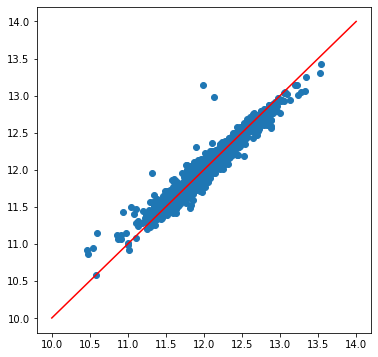

In [129]:
q1 = pd.DataFrame(train_predict).quantile(0.0005)
pre_df = pd.DataFrame(train_predict)
pre_df["SalePrice"] = train_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.99
train_predict = np.array(pre_df.SalePrice)
plt.figure(figsize=(6, 6))
plt.scatter(housing_labels, train_predict)
plt.plot(range(10, 15), range(10, 15), color="red")

In [133]:
test_predict = 0.4 * gbr.predict(test) + 0.3 * er.predict(test) + 0.3 * ridge.predict(test)
q1 = pd.DataFrame(test_predict).quantile(0.0042)
pre_df = pd.DataFrame(test_predict)
pre_df["SalePrice"] = test_predict
pre_df = pre_df[["SalePrice"]]
pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] = pre_df.loc[pre_df.SalePrice <= q1[0], "SalePrice"] *0.96
test_predict = np.array(pre_df.SalePrice)
sample_submission["SalePrice"] = np.exp(test_predict)-1
sample_submission.to_csv("sub_4.csv", index=False)